---
Traffic Volume Forecasting using RNN - Jupyter Notebook Documentation
---

# Introduction
This Jupyter Notebook provides a step-by-step implementation of a Recurrent Neural Network (RNN) model for Traffic Volume Forecasting. The purpose of this project is to predict the traffic volume in a city based on various features, including temperature, hour of the day, cloud cover, and snowfall.

# Data Preparation
First, we need to load and preprocess the dataset.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the data (replace 'Traffic_Volume.csv' with your dataset path)
data = pd.read_csv('Traffic_Volume.csv')

# Convert date_time column to datetime type
data['date_time'] = pd.to_datetime(data['date_time'])

# Sort by date_time in ascending order
data = data.sort_values('date_time')

# Extract the hour from the date_time column
data['hour'] = data['date_time'].dt.hour

# Variables for training (update with the relevant columns for your dataset)
cols = ['temp', 'hour', 'clouds_all', 'snow_1h', 'rain_1h']
target_col = 'traffic_volume'

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['holiday', 'weather_main', 'weather_description'])

# New dataframe with only training data - selected columns
df_for_training = data[cols + [target_col]].astype(float)

# Normalize the dataset
scaler = MinMaxScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

# Separate features and target
X = df_for_training_scaled[:, :-1]
y = df_for_training_scaled[:, -1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for RNN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the RNN Model
Next, we will build the RNN model for traffic volume forecasting.

In [14]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4480      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


# Training the RNN Model
Now, we will train the RNN model on the training data.

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
604/604 [==============================] - 2s 2ms/step - loss: 0.0652 - val_loss: 0.0648
Epoch 2/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 3/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0612 - val_loss: 0.0588
Epoch 4/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0545 - val_loss: 0.0478
Epoch 5/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0397 - val_loss: 0.0323
Epoch 6/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0286 - val_loss: 0.0267
Epoch 7/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0256 - val_loss: 0.0273
Epoch 8/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0250
Epoch 9/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0245
Epoch 10/50
604/604 [==============================] - 1s 2ms/step - loss: 0.0247 - val_loss: 0.0246

# Making Predictions
With the trained model, we can make predictions on the training and testing sets.

In [16]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_train_pred = scaler.inverse_transform(np.concatenate((X_train.reshape(-1, X_train.shape[2]), y_train_pred), axis=1))[:, -1]
y_test_pred = scaler.inverse_transform(np.concatenate((X_test.reshape(-1, X_test.shape[2]), y_test_pred), axis=1))[:, -1]

302/302 [==============================] - 0s 951us/step


# Evaluating the Model
Let's evaluate the performance of the model using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train R2:", train_r2)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)

Train MSE: 12915283.63730259
Train RMSE: 3593.784027637525
Train MAE: 3195.1128310625513
Train R2: -173244292.4934043
Test MSE: 13029523.787939109
Test RMSE: 3609.643166289309
Test MAE: 3220.399077528467
Test R2: -175292601.92497137


# Visualizing the Results
Finally, we will visualize the training and testing data, along with the model predictions.

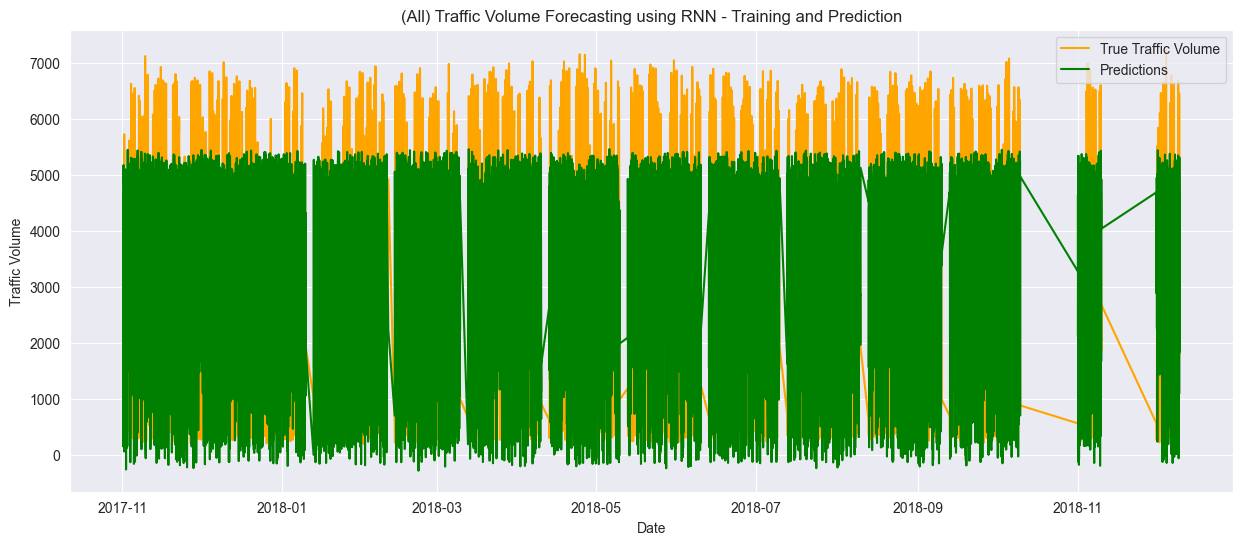

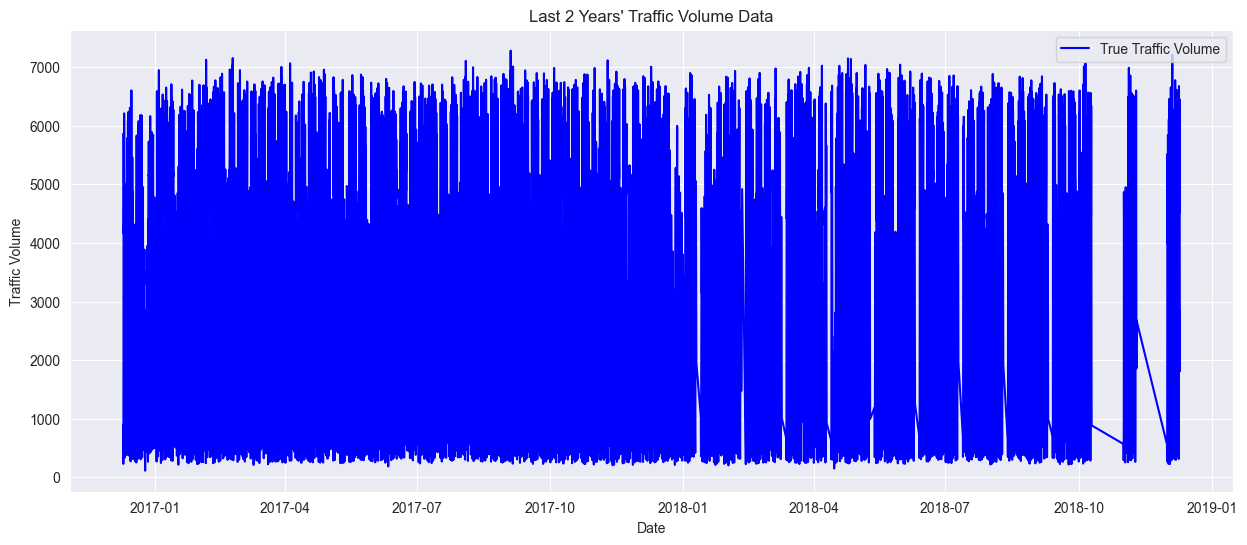

In [18]:
# Plot the training data and predictions
plt.figure(figsize=(15, 6))  # Increase the figure width

# Training and prediction plot
# plt.plot(data['date_time'][:-len(X_test)], data['traffic_volume'][:-len(X_test)], label='Training Data', color='blue')
plt.plot(data['date_time'][-len(X_test):], data['traffic_volume'][-len(X_test):], label='True Traffic Volume', color='orange')
plt.plot(data['date_time'][-len(X_test):], y_test_pred, label='Predictions', color='green')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('(All) Traffic Volume Forecasting using RNN - Training and Prediction')
plt.legend()

# Save the plot as an image
plt.savefig('All_traffic_volume_forecast_training_prediction_RNN.png')

plt.show()

# Plot the last 2 years' data
plt.figure(figsize=(15, 6))  # Increase the figure width

# Get the start date for the last 2 years
start_date = data['date_time'].max() - pd.DateOffset(years=2)

# Filter the data for the last 2 years
last_2_years_data = data[data['date_time'] >= start_date]

# Last 2 years' data plot
plt.plot(last_2_years_data['date_time'], last_2_years_data['traffic_volume'], label='True Traffic Volume', color='blue')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Last 2 Years\' Traffic Volume Data')
plt.legend()

# Save the plot as an image
plt.savefig('last_2_years_traffic_volume.png')

plt.show()

# Conclusion
In this notebook, we successfully implemented an RNN model for Traffic Volume Forecasting. The model was trained on the provided dataset, and its performance was evaluated using various metrics. The results were visualized to better understand the model's performance and provide insights into the traffic volume patterns. The trained model can now be used for future traffic volume predictions, aiding in traffic management and planning.